In [601]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OrdinalEncoder,LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from scipy.stats.mstats import winsorize
from scipy.stats import trim_mean

In [602]:
data = pd.read_csv('train.csv')

In [603]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [604]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [605]:
data.shape

(8693, 14)

In [606]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [607]:
data.drop(['Name'],axis=1,inplace=True)

In [608]:
data.shape

(8693, 13)

In [609]:
numerical_col = data.select_dtypes(exclude=['object','bool']).columns.tolist()
numerical_col

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [610]:
imuter = SimpleImputer(strategy='mean')
num_without_nulls = pd.DataFrame(imuter.fit_transform(data[numerical_col]))
num_without_nulls.columns = data[numerical_col].columns
num_without_nulls.isnull().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [611]:
data.drop(numerical_col,axis=1,inplace=True)
data = pd.concat([data,num_without_nulls],axis=1)
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
VIP             203
Transported       0
Age               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
dtype: int64

In [612]:
categorical_col = data.select_dtypes(include=['object','bool']).columns.tolist()
categorical_col

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Transported']

In [613]:
imuter = SimpleImputer(strategy='most_frequent')
cat_without_nulls = pd.DataFrame(imuter.fit_transform(data[categorical_col]))
cat_without_nulls.columns = data[categorical_col].columns
cat_without_nulls.isnull().sum()

PassengerId    0
HomePlanet     0
CryoSleep      0
Cabin          0
Destination    0
VIP            0
Transported    0
dtype: int64

In [614]:
data.drop(categorical_col,axis=1,inplace=True)
data = pd.concat([data,cat_without_nulls],axis=1)
data.isnull().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
VIP             0
Transported     0
dtype: int64

In [615]:
def Group(data):    
    group = []
    for id in data.PassengerId:
        group.append(int(id.split('_')[0]))
    return group

In [616]:
group = Group(data)
group

[1,
 2,
 3,
 3,
 4,
 5,
 6,
 6,
 7,
 8,
 8,
 8,
 9,
 10,
 11,
 12,
 14,
 15,
 16,
 17,
 17,
 20,
 20,
 20,
 20,
 20,
 20,
 22,
 24,
 25,
 26,
 28,
 30,
 31,
 31,
 31,
 34,
 35,
 36,
 38,
 39,
 41,
 43,
 44,
 44,
 44,
 45,
 45,
 50,
 51,
 52,
 53,
 56,
 56,
 56,
 58,
 61,
 62,
 64,
 64,
 66,
 67,
 67,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 76,
 77,
 78,
 81,
 82,
 82,
 82,
 84,
 85,
 86,
 88,
 90,
 91,
 91,
 92,
 92,
 92,
 97,
 98,
 98,
 99,
 99,
 101,
 102,
 103,
 103,
 103,
 105,
 107,
 108,
 108,
 108,
 110,
 110,
 110,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 119,
 119,
 120,
 122,
 123,
 126,
 127,
 128,
 128,
 129,
 133,
 133,
 134,
 136,
 138,
 138,
 139,
 140,
 140,
 141,
 144,
 146,
 147,
 148,
 149,
 151,
 152,
 160,
 163,
 163,
 164,
 164,
 165,
 167,
 167,
 169,
 170,
 171,
 172,
 173,
 174,
 177,
 178,
 179,
 179,
 179,
 181,
 182,
 183,
 186,
 188,
 189,
 190,
 192,
 192,
 192,
 193,
 193,
 193,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 201,
 202,
 202,
 203,
 205,
 2

In [617]:
data.PassengerId = group
data.rename(columns={'PassengerId':'Group'},inplace=True)
data.Group

0          1
1          2
2          3
3          3
4          4
        ... 
8688    9276
8689    9278
8690    9279
8691    9280
8692    9280
Name: Group, Length: 8693, dtype: int64

In [618]:
def Cabines(data):
    deck = []
    num = []
    side = []
    for cabin in data.Cabin:
        deck.append(cabin.split('/')[0])
        num.append(int(cabin.split('/')[1]))
        side.append(cabin.split('/')[-1])
    return deck,num,side

In [619]:
deck,num,side = Cabines(data)
deck,num,side

(['B',
  'F',
  'A',
  'A',
  'F',
  'F',
  'F',
  'G',
  'F',
  'B',
  'B',
  'B',
  'F',
  'G',
  'F',
  'G',
  'F',
  'F',
  'F',
  'G',
  'F',
  'E',
  'E',
  'E',
  'E',
  'E',
  'E',
  'D',
  'C',
  'F',
  'C',
  'F',
  'G',
  'F',
  'F',
  'F',
  'D',
  'D',
  'F',
  'F',
  'G',
  'G',
  'B',
  'G',
  'G',
  'G',
  'F',
  'F',
  'E',
  'E',
  'G',
  'F',
  'A',
  'A',
  'A',
  'G',
  'F',
  'F',
  'F',
  'E',
  'G',
  'G',
  'G',
  'F',
  'E',
  'F',
  'F',
  'F',
  'F',
  'D',
  'C',
  'F',
  'F',
  'C',
  'G',
  'F',
  'F',
  'F',
  'G',
  'C',
  'F',
  'E',
  'G',
  'G',
  'F',
  'G',
  'G',
  'G',
  'A',
  'G',
  'G',
  'F',
  'G',
  'G',
  'F',
  'F',
  'G',
  'G',
  'F',
  'D',
  'G',
  'G',
  'G',
  'G',
  'B',
  'B',
  'B',
  'E',
  'B',
  'F',
  'G',
  'F',
  'D',
  'A',
  'A',
  'F',
  'G',
  'F',
  'F',
  'E',
  'D',
  'E',
  'G',
  'F',
  'D',
  'G',
  'G',
  'G',
  'E',
  'C',
  'G',
  'F',
  'F',
  'F',
  'G',
  'G',
  'F',
  'G',
  'G',
  'F',
  'G',
  'B',
  'B',

In [620]:
cabin_df = pd.DataFrame({'Deck':deck,'Num':num,'Side':side})
cabin_df

,Deck,Num,Side
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S
...,...,...,...
8688,A,98,P
8689,G,1499,S
8690,G,1500,S
8691,E,608,S


In [621]:
data.drop('Cabin',axis=1,inplace=True)
data = pd.concat([data,cabin_df],axis=1)
data.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,HomePlanet,CryoSleep,Destination,VIP,Transported,Deck,Num,Side
0,39.0,0.0,0.0,0.0,0.0,0.0,1,Europa,False,TRAPPIST-1e,False,False,B,0,P
1,24.0,109.0,9.0,25.0,549.0,44.0,2,Earth,False,TRAPPIST-1e,False,True,F,0,S
2,58.0,43.0,3576.0,0.0,6715.0,49.0,3,Europa,False,TRAPPIST-1e,True,False,A,0,S
3,33.0,0.0,1283.0,371.0,3329.0,193.0,3,Europa,False,TRAPPIST-1e,False,False,A,0,S
4,16.0,303.0,70.0,151.0,565.0,2.0,4,Earth,False,TRAPPIST-1e,False,True,F,1,S


In [622]:
data.shape

(8693, 15)

In [623]:
data.isnull().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Group           0
HomePlanet      0
CryoSleep       0
Destination     0
VIP             0
Transported     0
Deck            0
Num             0
Side            0
dtype: int64

In [624]:
categorical_col.extend(['Deck','Side'])
categorical_col.remove('Cabin')
categorical_col.remove('PassengerId')
numerical_col.extend(['Num','Group'])
print(f'Categorical columns : {categorical_col}, Numerical columns: {numerical_col}')

Categorical columns : ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported', 'Deck', 'Side'], Numerical columns: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Num', 'Group']


In [625]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Num
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.00000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,4633.389624,603.42678
std,14.339054,659.739364,1594.434978,597.417440,1124.675871,1133.259049,2671.028856,506.36841
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2319.000000,173.00000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4630.000000,448.00000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000,6883.000000,983.00000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,9280.000000,1894.00000


In [626]:
# for col in numerical_col:
#     sns.boxplot(data[col])
#     plt.show()

In [627]:
# def Outliers(data,numerical_col):
#     outliers = {}
#     for col in numerical_col:
#         q1 = data[col].quantile(0.25)
#         q3 = data[col].quantile(0.75)
#         iqr = q3 - q1
#         outliers[col] = data[~((data[col] > (q1 - 1.5 * iqr)) & (data[col] < (q3 + 1.5 * iqr)))].index.tolist()
#         print(f'Outliers in {col}: {len(outliers[col])}')
#     return outliers

In [628]:
# outliers = Outliers(data,numerical_col)

In [629]:
# for col, indices in outliers.items():
#     data.loc[indices, col] = trim_mean(data[col], proportiontocut=0.05)
#     q1 = data[col].quantile(0.25)
#     q3 = data[col].quantile(0.75)
#     iqr = q3 - q1
#     print(f'outliers in {col}: {len(data[~((data[col] > (q1 - 1.5 * iqr)) & (data[col] < (q3 + 1.5 * iqr)))].index.tolist())}')

In [630]:
# for col in numerical_col:
#     q1 = data[col].quantile(0.25)
#     q3 = data[col].quantile(0.75)
#     iqr = q3 - q1
#     if len(data[~((data[col] > (q1 - 1.5 * iqr)) & (data[col] < (q3 + 1.5 * iqr)))].index.tolist()) > 0:
#         data[col]= winsorize(data[col],(0.05,0.05))
#     print(f'outliers in {col}: {len(data[~((data[col] > (q1 - 1.5 * iqr)) & (data[col] < (q3 + 1.5 * iqr)))].index.tolist())}')

In [631]:
# for col in numerical_col:
#     sns.boxplot(data[col])
#     plt.show()

In [632]:
standered = StandardScaler().fit_transform(data[numerical_col])
standered = pd.DataFrame(standered,columns=numerical_col)
data.loc[:,numerical_col] = standered
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Num
count,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03
mean,-1.761440e-16,5.987260e-17,7.356361e-17,7.724179e-17,-5.803351e-17,-6.436816e-17,-2.615595e-17,-1.177018e-16
std,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00
min,-2.010564e+00,-3.405899e-01,-2.873140e-01,-2.908170e-01,-2.766634e-01,-2.690226e-01,-1.734409e+00,-1.191744e+00
25%,-6.156918e-01,-3.405899e-01,-2.873140e-01,-2.908170e-01,-2.766634e-01,-2.690226e-01,-8.665285e-01,-8.500758e-01
50%,-1.274865e-01,-3.405899e-01,-2.873140e-01,-2.908170e-01,-2.766634e-01,-2.690226e-01,-1.269106e-03,-3.069617e-01
75%,5.699497e-01,-2.223546e-01,-2.133024e-01,-2.154885e-01,-1.975250e-01,-2.063679e-01,8.422746e-01,7.496421e-01
max,3.499182e+00,2.137681e+01,1.841192e+01,3.903403e+01,1.964845e+01,2.102742e+01,1.739733e+00,2.548831e+00


In [633]:
# cat_dd = OrdinalEncoder().fit_transform(data[categorical_col])
# cat_dd = pd.DataFrame(cat_dd,columns=categorical_col)
# data.loc[:,categorical_col] = cat_dd
for col in categorical_col:
    data[col] = LabelEncoder().fit_transform(data[col])

In [634]:
data.dtypes 

Age             float64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Group           float64
HomePlanet        int32
CryoSleep         int32
Destination       int32
VIP               int32
Transported       int32
Deck              int32
Num             float64
Side              int32
dtype: object

In [635]:
data = data.astype('float64') 
data.dtypes

Age             float64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Group           float64
HomePlanet      float64
CryoSleep       float64
Destination     float64
VIP             float64
Transported     float64
Deck            float64
Num             float64
Side            float64
dtype: object

<Axes: xlabel='Transported', ylabel='Count'>

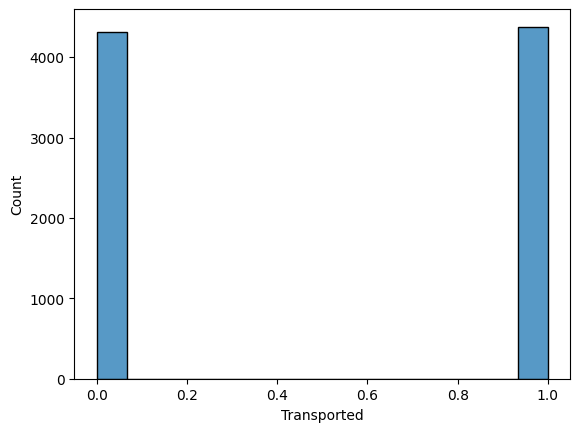

In [636]:
X_train = data.drop('Transported',axis=1)
y_train = data.Transported
sns.histplot(y_train)

In [637]:
test = pd.read_csv('test.csv')
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [638]:
print(test.isnull().sum())

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [639]:
ID  = test.PassengerId

In [640]:
test.drop(['Name'],axis=1,inplace=True)

numerical_col = test.select_dtypes(exclude=['object','bool']).columns.tolist()

imuter = SimpleImputer(strategy='mean')
num_without_nulls = pd.DataFrame(imuter.fit_transform(test[numerical_col]))
num_without_nulls.columns = test[numerical_col].columns
test.drop(numerical_col,axis=1,inplace=True)
test = pd.concat([test,num_without_nulls],axis=1)

categorical_col = test.select_dtypes(include=['object','bool']).columns.tolist()

imuter = SimpleImputer(strategy='most_frequent')
cat_without_nulls = pd.DataFrame(imuter.fit_transform(test[categorical_col]))
cat_without_nulls.columns = test[categorical_col].columns
test.drop(categorical_col,axis=1,inplace=True)
test = pd.concat([test,cat_without_nulls],axis=1)

group = Group(test)

test.PassengerId = group
test.rename(columns={'PassengerId':'Group'},inplace=True)

deck,num,side = Cabines(test)

cabin_df = pd.DataFrame({'Deck':deck,'Num':num,'Side':side})
test.drop('Cabin',axis=1,inplace=True)
test = pd.concat([test,cabin_df],axis=1)

categorical_col.extend(['Deck','Side'])
categorical_col.remove('Cabin')
categorical_col.remove('PassengerId')
numerical_col.extend(['Num','Group'])

standered = StandardScaler().fit_transform(test[numerical_col])
standered = pd.DataFrame(standered,columns=numerical_col)
test.loc[:,numerical_col] = standered

# cat_dd = OrdinalEncoder().fit_transform(test[categorical_col])
# cat_dd = pd.DataFrame(cat_dd,columns=categorical_col)
# test.loc[:,categorical_col] = cat_dd
for col in categorical_col:
    test[col] = LabelEncoder().fit_transform(test[col])
test = test.astype('float64') 
X_test = test

In [641]:
# xx_train,xx_test,yy_train,yy_test = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [642]:
# model = RandomForestClassifier()
# grid = GridSearchCV(model,param_grid={'n_estimators':[100,200,500],'max_depth':[5,10,25],'criterion':['gini','entropy','log_loss']})
# grid.fit(X_train,y_train)
# print(grid.best_params_)

In [643]:
# model = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'],max_depth=grid.best_params_['max_depth'],criterion=grid.best_params_['criterion'])
# model.fit(xx_train,yy_train)
# pred = model.predict(xx_test)
# print(model.score(xx_test,yy_test))
# print(pred)

In [644]:
# model = GradientBoostingClassifier(loss='exponential')
# model.fit(xx_train,yy_train)
# y_pred = model.predict(xx_test)
# print(model.score(xx_test,yy_test))

In [645]:
# model = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'],max_depth=grid.best_params_['max_depth'],criterion=grid.best_params_['criterion'])
# model.fit(X_train,y_train)
# y_pred = model.predict(X_test)

In [646]:
model = GradientBoostingClassifier(loss='exponential')
model.fit(X_train,y_train)
y_predediction = model.predict(X_test)

In [647]:
y_predediction.tolist()
y_predediction

array([1., 0., 1., ..., 1., 1., 1.])

In [648]:
y_predediction = y_predediction.astype('bool')

In [649]:
Submission = pd.DataFrame({'PassengerId':ID,'Transported':y_predediction})
Submission.to_csv('Submission.csv',index=False)
Submission


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
